In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
import pandas as pd

(540, 800)


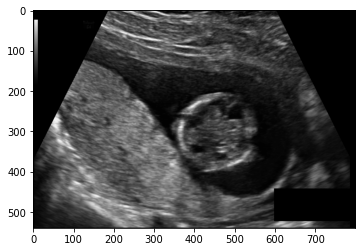

In [2]:
image1 = cv2.imread('29/114_HC.png',0)
print(image1.shape)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
#plt.imshow(image1)

In [3]:
# part a

In [4]:
# Types of noises
# 1.1	Gaussian noise
# 1.2	Salt-and-pepper noise
# 1.3	Shot noise
# 1.4	Quantization noise (uniform noise)
# 1.5	Film grain
# 1.6	Anisotropic noise
# 1.7	Periodic noise

In [5]:
# part b - apply filters
#1
# linear filter
def mean_filter(img):
    image = cv2.blur(img,(5,5))
    return image

In [6]:
# non-linear filter
def median_filter(img):
    image = cv2.medianBlur(img,5)
    return image

In [7]:
# non-linear filter
def gaussian_filter(img):
    image = cv2.GaussianBlur(img,(5,5),0)
    return image

In [8]:
def bilateral_filter(img):
    image = cv2.bilateralFilter(img,9,75,75)
    return image

In [9]:
# linear filter
def laplacian_filter(img):
    image = cv2.Laplacian(img,cv2.CV_64F)
    return image

In [10]:
images=[]
for i in range(5):
    images.append(cv2.imread('29/11'+str(i+4)+'_HC.png',0))

In [11]:
def apply_filters(img):
    mean = mean_filter(img)
    median = median_filter(img)
    gaussian = gaussian_filter(img)
    bilateral = bilateral_filter(img)
    laplacian = laplacian_filter(img)
    return [mean, median, gaussian, bilateral, laplacian]

In [12]:
filtered_image = []
for i in range(5):
    filtered_image.append(apply_filters(images[i]))

In [13]:
np.array(filtered_image).shape

(5, 5, 540, 800)

In [14]:
residual_image = list([0]*5 for i in range(5))
for i in range(5):
    for j in range(5):
        residual_image[i][j] = images[i] - filtered_image[i][j]
np.array(residual_image).shape

(5, 5, 540, 800)

In [15]:
names=['mean', 'median', 'gaussian', 'bilateral', 'laplacian']
for i in range(5):
    for j in range(5):
        cv2.imwrite('11'+str(i+4)+'_HC residual '+names[j]+'.png',residual_image[i][j])

In [16]:
from math import log10, sqrt  

def PSNR(original, given): 
    mse = np.mean((original - given) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

In [17]:
psnr=list([0]*5 for i in range(5))
for i in range(5):
    for j in range(5):
        psnr[i][j] = PSNR(residual_image[i][j],images[i])
np.array(psnr).shape

(5, 5)

In [18]:
psnr = pd.DataFrame(psnr, columns=['mean_filter', 'median_filter', 'gaussian_filter', 'bilateral_filter', 'laplacian_filter'])

In [19]:
psnr['image_name']=['114_HC.png','115_HC.png','116_HC.png','117_HC.png','118_HC.png']

In [20]:
psnr

,mean_filter,median_filter,gaussian_filter,bilateral_filter,laplacian_filter,image_name
0,28.769379,28.904344,28.794616,28.764317,23.433692,114_HC.png
1,28.425855,28.575815,28.439923,28.417292,23.371094,115_HC.png
2,29.379925,29.523246,29.409036,29.338637,27.086014,116_HC.png
3,27.844336,27.947333,27.858271,27.809359,26.786010,117_HC.png
4,28.358612,28.481780,28.385121,28.327421,23.855555,118_HC.png


In [21]:
#part 2 below
# below written codes are for experimentation
# question 2

In [22]:
def imadjust(x,a,b,c,d,gamma=1):
    y = (((x - a) / (b - a)) ** gamma) * (d - c) + c
    return y

(291, 240, 3)


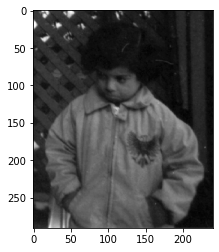

In [23]:
image=cv2.imread('test_boy.png')
arr=image
print(arr.shape)
arr2=imadjust(arr,arr.min(),arr.max(),0,1)
plt.imshow(arr2)

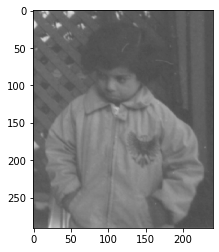

In [24]:

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

(291, 240)
(291, 240)


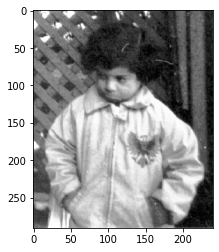

In [25]:
src = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(src.shape)
hist= cv2.equalizeHist(src)
print(hist.shape)
plt.imshow(cv2.cvtColor(hist, cv2.COLOR_GRAY2RGB))

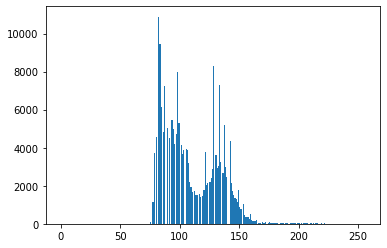

In [26]:
plt.hist(image.ravel(),256,[0,256])
plt.show()

True

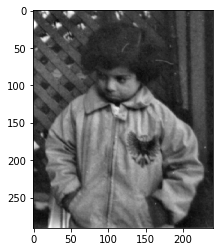

In [27]:
image=cv2.imread('test_boy.png',0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(image)
plt.imshow(cl1, cmap='gray')
cv2.imwrite('clahe.png',cl1)

In [28]:
image=cv2.imread('29/114_HC.png')
#src = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
src = filtered_image[0][2]
print(src.shape)
hist= cv2.equalizeHist(src)
hist = cv2.cvtColor(hist, cv2.COLOR_GRAY2BGR)
print(hist.shape)
edges = cv2.Canny(hist,200,300)

(540, 800)
(540, 800, 3)


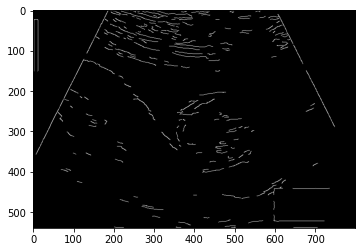

In [29]:
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

In [30]:
frame=cv2.imread('29/114_HC.png')
src = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
print(src.shape)
hist= cv2.equalizeHist(src)
frame = cv2.cvtColor(hist, cv2.COLOR_GRAY2BGR)
# Calcution of Sobelx 
sobelx = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5) 

# Calculation of Sobely 
sobely = cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5) 

# Calculation of Laplacian 
laplacian = cv2.Laplacian(frame,cv2.CV_64F) 

np.unique(sobelx+sobely)

(540, 800)


array([-15428., -13484., -13104., ...,  17330.,  17334.,  17340.])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


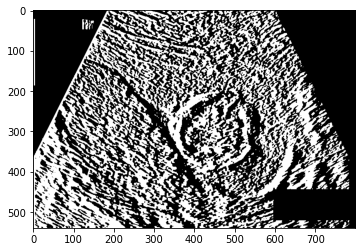

In [31]:
plt.imshow(sobelx)

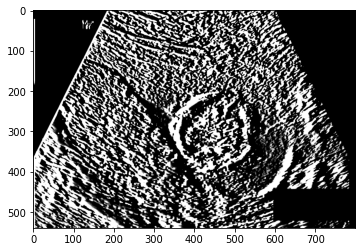

In [32]:
clipped = np.clip(sobelx,0,255)
clipped = clipped.astype(np.uint8)
plt.imshow(clipped)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[-11377. -11363. -11310. ...  12095.  12096.  12240.]


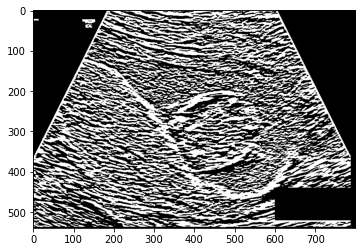

In [33]:
print(np.unique(sobely))
plt.imshow(sobely)

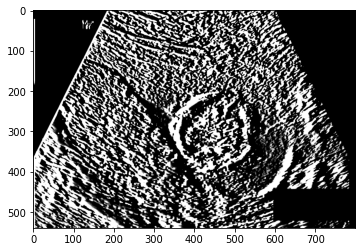

In [34]:
clipped = np.clip(sobelx,0,255)
clipped = clipped.astype(np.uint8)
#print(np.unique(clipped))
plt.imshow(clipped)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


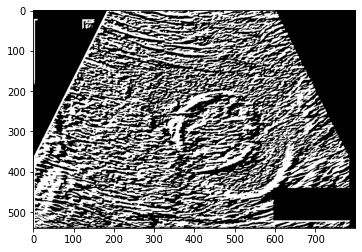

In [35]:
plt.imshow(sobelx+sobely)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


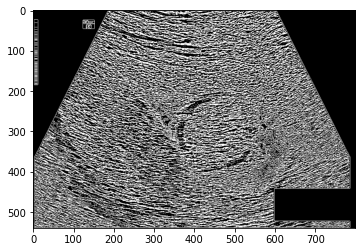

In [36]:
plt.imshow(laplacian)

(540, 800, 3)
(540, 800, 3)


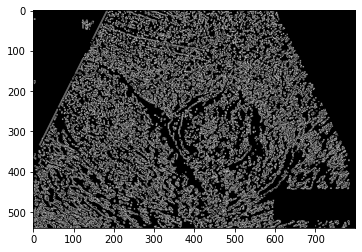

In [37]:
print(sobelx.shape)
clipped = np.clip(sobelx,0,256)
clipped = clipped.astype(np.uint8)
print(clipped.shape)
edges = cv2.Canny(clipped,200,200)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

In [38]:
#prewitt
def prewitt_edge_detection(image):
    img_gaussian = cv2.GaussianBlur(image,(3,3),0)
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
    img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
    return [img_prewittx,img_prewitty,img_prewittx+img_prewitty]

(540, 800, 3)

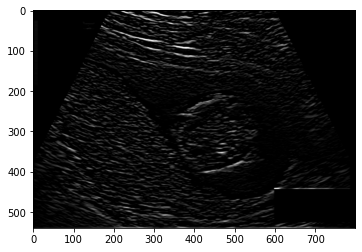

In [39]:
frame=cv2.imread('29/114_HC.png')
prewitt = prewitt_edge_detection(frame)
plt.imshow(prewitt[0])
prewitt[2].shape

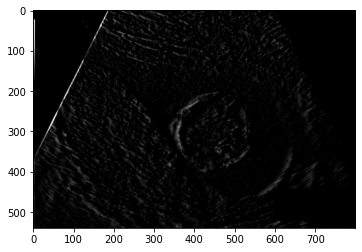

In [40]:
plt.imshow(prewitt[1])

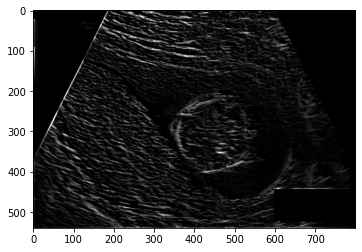

In [41]:
plt.imshow(prewitt[2])

In [42]:
# Read image as gray-scale
img = cv2.imread('29/114_HC.png')
src = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(src.shape)
hist= cv2.equalizeHist(src)
# Convert to gray-scale
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray=hist
# Blur the image to reduce noise
img_blur = cv2.medianBlur(gray, 25)
edges = cv2.Canny(img_blur,0,300)
img_blur = edges
# Apply hough transform on the image
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, img.shape[0]/64, param1=200, param2=10, minRadius=80, maxRadius=100)
print(circles)
# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)

(540, 800)
[[[457.5 300.5  97.2]]]


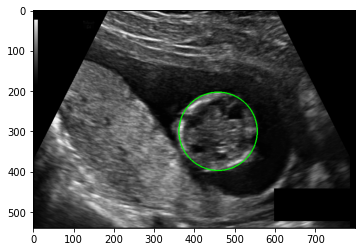

In [43]:
plt.imshow(img)

In [44]:
circles

array([[[458, 300,  97]]], dtype=uint16)

In [45]:
2*np.pi*97.2*0.131386392995

80.24103525166807

(540, 800)
[[[487.5 365.5 120.6]]]


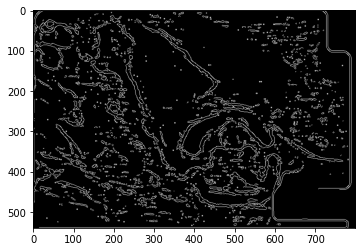

In [46]:
# Read image as gray-scale
img = cv2.imread('29/117_HC.png')
src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(src.shape)
hist= cv2.equalizeHist(src)
# Convert to gray-scale
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray=hist
# Blur the image to reduce noise
img_blur = cv2.medianBlur(gray,25)
th3 = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
img_blur = cv2.medianBlur(th3,3)
edges = cv2.Canny(img_blur,0,300)
plt.imshow(edges, cmap='gray')
img_blur = edges
# Apply hough transform on the image
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, img.shape[0]/0.5, param1=200, param2=10, minRadius=70, maxRadius=130)
print(circles)
# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)

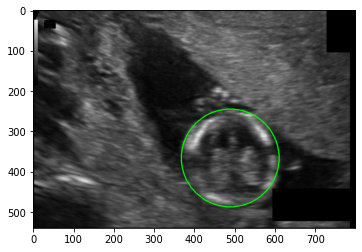

In [47]:
plt.imshow(img)

In [48]:
circles

array([[[488, 366, 121]]], dtype=uint16)

In [49]:
2*np.pi*120.6*0.109634995461

83.07615331157065

(540, 800)
[[[413.5 316.5 126.1]]]


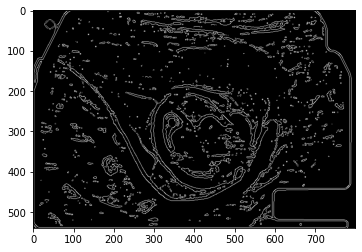

In [50]:
# Read image as gray-scale
img = cv2.imread('29/118_HC.png')
src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(src.shape)
hist= cv2.equalizeHist(src)
# Convert to gray-scale
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray=hist
# Blur the image to reduce noise
img_blur = cv2.medianBlur(gray,25)
th3 = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
img_blur = cv2.medianBlur(th3,3)
edges = cv2.Canny(img_blur,0,300)
plt.imshow(edges, cmap='gray')
img_blur = edges
# Apply hough transform on the image
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, img.shape[0]/0.5, param1=200, param2=10, minRadius=70, maxRadius=130)
print(circles)
# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)

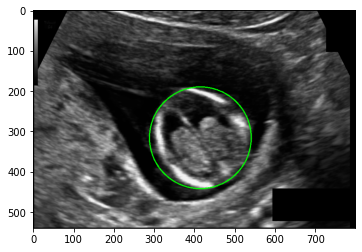

In [51]:
plt.imshow(img)

In [52]:
circles

array([[[414, 316, 126]]], dtype=uint16)

In [53]:
2*np.pi*126.1*0.101576994876

80.48043500896999

(540, 800)
[[[505.5 299.5 118.4]]]


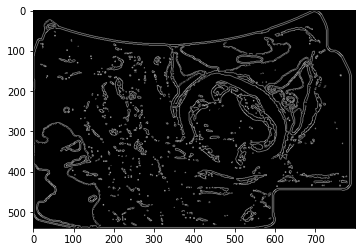

In [54]:
# Read image as gray-scale
img = cv2.imread('29/116_HC.png')
src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(src.shape)
hist= cv2.equalizeHist(src)
# Convert to gray-scale
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray=hist
# Blur the image to reduce noise
img_blur = cv2.medianBlur(gray,25)
th3 = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
img_blur = cv2.medianBlur(th3,3)
edges = cv2.Canny(img_blur,0,300)
plt.imshow(edges, cmap='gray')
img_blur = edges
# Apply hough transform on the image
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, img.shape[0]/0.5, param1=200, param2=10, minRadius=70, maxRadius=130)
print(circles)
# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)

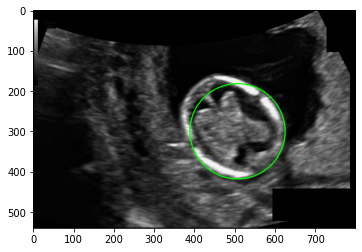

In [55]:
plt.imshow(img)

In [56]:
circles

array([[[506, 300, 118]]], dtype=uint16)

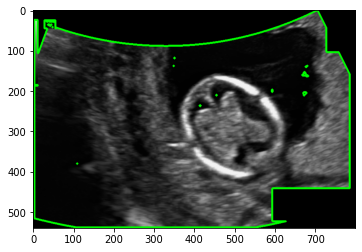

In [57]:
im = cv2.imread('29/116_HC.png')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

hist= cv2.equalizeHist(imgray)
# Convert to gray-scale
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray=hist
# Blur the image to reduce noise
img_blur = cv2.medianBlur(gray,25)
th3 = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
img_blur = cv2.medianBlur(th3,5)
edges = cv2.Canny(img_blur,0,300)
thresh = imgray
#ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(im, image, -1, (0,255,0), 3)
plt.imshow(img)

In [58]:
image[0]

array([[[701,   1]],

       [[700,   2]],

       [[699,   2]],

       ...,

       [[706,   3]],

       [[705,   2]],

       [[705,   1]]], dtype=int32)

In [59]:
#metrics for image 114

In [60]:
# 1. difference
# our value - excel value
(2*np.pi*97.2*0.131386392995) - 82.33

-2.0889647483319322

In [61]:
# 2. absolute difference
np.abs((2*np.pi*97.2*0.131386392995) - 82.33)

2.0889647483319322

(540, 800)
[[[505.5 299.5 118.4]]]


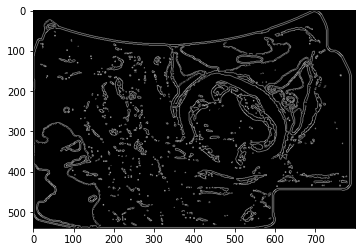

In [62]:
# Read image as gray-scale
img = cv2.imread('29/116_HC.png')
annote = cv2.imread('29/116_HC_Annotation.png')
src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(src.shape)
hist= cv2.equalizeHist(src)
# Convert to gray-scale
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray=hist
# Blur the image to reduce noise
img_blur = cv2.medianBlur(gray,25)
th3 = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
img_blur = cv2.medianBlur(th3,3)
edges = cv2.Canny(img_blur,0,300)
plt.imshow(edges, cmap='gray')
img_blur = edges
# Apply hough transform on the image
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, img.shape[0]/0.5, param1=200, param2=10, minRadius=70, maxRadius=130)
print(circles)
# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(annote, (i[0], i[1]), i[2], (0, 255, 0), 2)

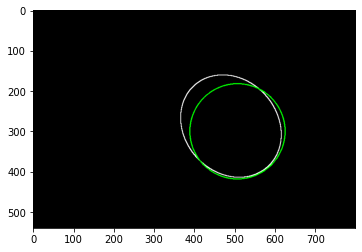

In [63]:
plt.imshow(annote)

In [64]:
circles

array([[[506, 300, 118]]], dtype=uint16)

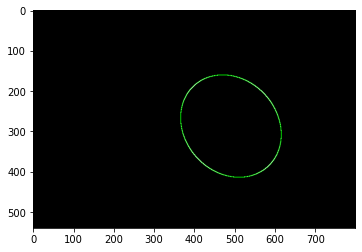

In [65]:
annote = cv2.imread('29/116_HC_Annotation.png')
src = cv2.cvtColor(annote, cv2.COLOR_BGR2GRAY)
image, contours = cv2.findContours(src,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(annote, image, -1, (0,255,0), 1)
plt.imshow(img)

In [66]:
image

[array([[[456, 160]],
 
        [[455, 161]],
 
        [[449, 161]],
 
        [[448, 162]],
 
        [[444, 162]],
 
        [[443, 163]],
 
        [[440, 163]],
 
        [[439, 164]],
 
        [[436, 164]],
 
        [[435, 165]],
 
        [[433, 165]],
 
        [[432, 166]],
 
        [[430, 166]],
 
        [[429, 167]],
 
        [[428, 167]],
 
        [[427, 168]],
 
        [[425, 168]],
 
        [[424, 169]],
 
        [[423, 169]],
 
        [[422, 170]],
 
        [[421, 170]],
 
        [[420, 171]],
 
        [[419, 171]],
 
        [[418, 172]],
 
        [[417, 172]],
 
        [[416, 173]],
 
        [[415, 173]],
 
        [[413, 175]],
 
        [[412, 175]],
 
        [[410, 177]],
 
        [[409, 177]],
 
        [[407, 179]],
 
        [[406, 179]],
 
        [[403, 182]],
 
        [[402, 182]],
 
        [[387, 197]],
 
        [[387, 198]],
 
        [[384, 201]],
 
        [[384, 202]],
 
        [[382, 204]],
 
        [[382, 205]],
 
        [[380, 2

In [67]:
"""
_dice.py : Dice coefficient for comparing set similarity.
"""

import numpy as np


def dice(im1, im2):
    """
    Computes the Dice coefficient, a measure of set similarity.
    Parameters
    ----------
    im1 : array-like, bool
        Any array of arbitrary size. If not boolean, will be converted.
    im2 : array-like, bool
        Any other array of identical size. If not boolean, will be converted.
    Returns
    -------
    dice : float
        Dice coefficient as a float on range [0,1].
        Maximum similarity = 1
        No similarity = 0
        
    Notes
    -----
    The order of inputs for `dice` is irrelevant. The result will be
    identical if `im1` and `im2` are switched.
    """
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)

    return 2. * intersection.sum() / (im1.sum() + im2.sum())

0.8957873737320428


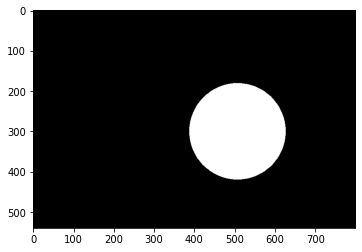

In [68]:
annote = cv2.imread('29/116_HC_Annotation.png')
src = cv2.cvtColor(annote, cv2.COLOR_BGR2GRAY)
image, contours = cv2.findContours(src,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(annote, image, -1, (0,255,0), 1)
cv2.fillPoly(img, pts =[image[0]], color=(255,255,255))
our_circle = np.zeros((src.shape[0],src.shape[1],3))
for i in circles[0, :]:
    # Draw outer circle
    cv2.circle(our_circle, (i[0], i[1]), i[2], (0, 255, 0), 2)
clipped = our_circle.astype(np.uint8)
src = cv2.cvtColor(clipped, cv2.COLOR_BGR2GRAY)
image, contours = cv2.findContours(src,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.fillPoly(clipped, pts =[image[0]], color=(255,255,255))
plt.imshow(clipped)
print(dice(img, clipped))

In [69]:
!python --version

Python 3.7.7


In [70]:
import matplotlib
matplotlib.__version__

'3.3.0'

In [71]:
cv2.__version__

'4.4.0'

In [72]:
np.__version__

'1.19.1'

In [73]:
pd.__version__

'1.0.5'

In [74]:
import PIL
PIL.__version__

'7.2.0'

In [75]:
!pip install Pillow

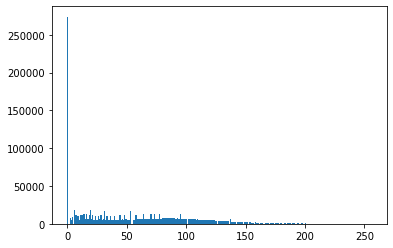

In [84]:
image = cv2.imread('29/114_HC.png')
plt.hist(image.ravel(),256,[0,256])
plt.show()